<a href="https://colab.research.google.com/github/jallenrobern/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [506]:
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [507]:
df = pd.read_excel('Exercise3_Personality.xlsx')

1. Display the summary of all the features of the dataset using `.info()`

In [508]:
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,Ian,0,0,1,227,0
1,Janine,0,0,1,515,0
2,Dianne,1,1,0,1655,1
3,Mia,1,0,0,360,0
4,Nadyn,1,0,1,300,1


2. Display the total number of samples from each label using `.value_counts()`

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         49 non-null     object
 1   Post/Share Frequently?       49 non-null     int64 
 2   Active in social media?      49 non-null     int64 
 3   Replies to comments?         49 non-null     int64 
 4   Number of friends/followers  49 non-null     int64 
 5   Personality                  49 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.4+ KB


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [510]:
X = df.drop(columns=['Name', 'Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [511]:
Y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [512]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(39, 4)
(39,)
(10, 4)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [513]:
knn = KNeighborsClassifier(n_neighbors=35)

7. Train the model using the `.fit()`

In [514]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=35)

8. Test the model using the `.predict()`

In [515]:
Y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

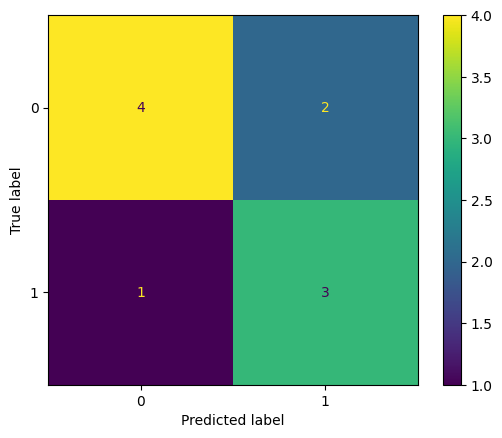

In [516]:
conf_matrix = confusion_matrix(Y_pred, Y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)

disp.plot()

10. Display the accuracy

In [517]:
metrics.accuracy_score(Y_test, Y_pred)

0.7

11. Display the precision

In [518]:
precision = precision_score(Y_test, Y_pred, average=None)
print("Precision:", precision)

Precision: [0.66666667 0.75      ]


12. Display the recall

In [519]:
recall = recall_score(Y_test, Y_pred, average=None)
print("Recall:", recall)

Recall: [0.8 0.6]


13. Display the f1-score

In [520]:
f1 = f1_score(Y_test, Y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.72727273 0.66666667]


In [521]:
knn.predict([[0, 1, 1, 400]])

array([0])